# Python for Machine Learning

### *Session \#1*


### Helpful shortcuts
---

**SHIFT** + **ENTER** ----> Execute Cell

**UP/DOWN ARROWS** --> Move cursor between cells (then ENTER to start typing)

**TAB** ----> See autocomplete options

**ESC** then **b** ----> Create Cell 

**ESC** then **dd** ----> Delete Cell

**\[python expression\]?** ---> Explanation of that Python expression

**ESC** then **m** then __ENTER__ ----> Switch to Markdown mode

## I. Preparing Data

### Warm Ups

*Type the given code into the cell below*

---

**Import pandas and read CSV**: 
```python
import pandas as pd
df = pd.read_csv("heart_attack.csv")
```

In [1]:
import pandas as pd
df = pd.read_csv("heart_attack.csv")

**Isolate a column:** `y = df['current_smoker']`

In [2]:
y = df['current_smoker']

**Use subset of columns**
```python
columns = ['current_smoker', 'education']
X = df[columns]
```

In [3]:
columns = ['current_smoker', 'education']
X = df[columns]

**Drop column:** `df.drop('heart_attack', 1)`

*Note: You can drop multiple columns at once, by using a list of column names*

In [5]:
df.drop('heart_attack', 1)

**Split data into train/test sets:**
```python
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
```

*Note: Default split is 0.75 train, 0.25 test. Can change proportion using* `test_size` *parameter*

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Exercises
---

**1. Create the feature matrix** `X` **by forming a dataframe from the columns** `male, current_smoker` **and**   `education` 

In [8]:
columns = ['male', 'current_smoker', 'education']
X = df[columns]

**2. Now create the feature matrix** `X` **by instead just dropping** `heart_attack` **from the original dataframe**

In [9]:
X = df.drop('heart_attack', 1)

**3. Create the target vector** `y` **from the column** `heart_attack`

In [10]:
y = df['heart_attack']

**4. Use** `train_test_split` **to divide your data into** `X_train`, `X_test`, `y_train`, `y_test`

**Add the parameter** `random_state=1` **to lock in the a particular random selection of rows.** 

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

## II. K-Nearest Neighbors

### Warm Ups

*Type the given code into the cell below*

---

**Create KNN Classifier**: 
```python
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
```

In [12]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)

**Fit model**: `model.fit(X_train, y_train)`

In [13]:
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

**Classify using model**: `model.predict(X_test)`

In [15]:
model.predict(X_test)

**Evaluate accuracy of model**: `model.score(X_test, y_test)`

In [16]:
model.score(X_test, y_test)

0.8140043763676149

## III. Evaluating Classifiers

### Warm Ups

*Type the given code into the cell below*

---

In [17]:
from yellowbrick.classifier import ConfusionMatrix, ClassPredictionError
from yellowbrick.model_selection import ValidationCurve

**Plot confusion matrix:** 
```python
matrix = ConfusionMatrix(KNeighborsClassifier())
matrix.fit(X_train, y_train)
matrix.score(X_test, y_test)
matrix.finalize()
```

**Plot class prediction error:** 
```python
error = ClassPredictionError(KNeighborsClassifier())
error.fit(X_train, y_train)
error.score(X_test, y_test)
error.finalize()
```

**Plot validation Curve:** 
```python
viz = ValidationCurve(
    KNeighborsClassifier(), param_name="n_neighbors",
    param_range=range(1, 11)
)
viz.fit(X, y)
viz.finalize()
```

### Exercises
---
**1. Plot the confusion matrix. After accuracy, another important metric is sensitivity (also called recall or true positive rate).**

**Of the patients who DID have a heart attack, what percentage were correctly identified by the model?**

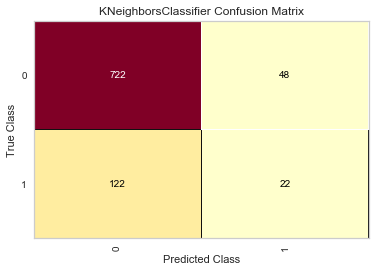

In [18]:
# Divide true positives by ALL that had heart attack
# Your numbers may be slightly different
sensitivity = 22/(122+22)

**2. Plot the class prediction error. Which type of patient is more common -- with or without a heart attack?**

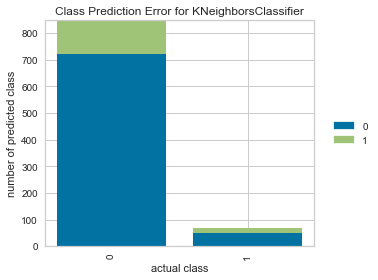

In [19]:
error = ClassPredictionError(model)
error.fit(X_train, y_train)
error.score(X_test, y_test)
error.finalize()

# No heart attack is WAY more commone

**3. Use the Validation Curve to find a reasonable number of neighbors for KNN classifier**


/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


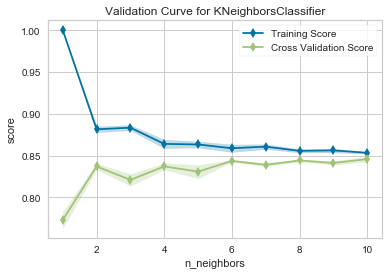

In [20]:
viz = ValidationCurve(
    KNeighborsClassifier(), param_name="n_neighbors",
    param_range=range(1, 11)
)
viz.fit(X, y)
viz.finalize()

## IV. Bonus Section

### Exercises
---
**1. Divide the dataset into a training set and test set, then train a KNeighborsClassifier on it.**

*Note: In this exercise the `label` column is what we are trying to predict*

In [22]:
df = pd.read_csv('digits.csv')

X = df.drop('label', 1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

**2. Use the** `jupyter_drawing_pad` **widget to draw a digit**

*Hint: Outline the number multiple times to get more data points*

In [32]:
import jupyter_drawing_pad as jd
import numpy as np
widget = jd.CustomBox()
widget.drawing_pad

DrawingPad(data=[[], [], []])

**3. Run the following code, which convert the drawing into simple numerical form and plots it**

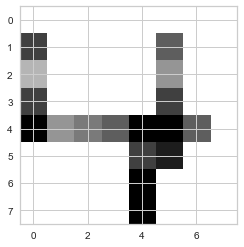

In [33]:
from matplotlib import pyplot as plt
%matplotlib inline

def extract_data(widget):
    x_data = widget.drawing_pad.data[0]
    y_data = widget.drawing_pad.data[1]

    x_axis = np.linspace(min(x_data), max(x_data), 8)
    y_axis = np.linspace(min(y_data), max(y_data), 8)

    x_interval = x_axis[1] - x_axis[0]
    y_interval = y_axis[1] - y_axis[0]

    data = np.array(list(zip(x_data,y_data)), dtype=[('x', '<f8'), ('y', '<f8')])
    totals = np.zeros((8,8))

    for x_num, x in enumerate(x_axis):
        for y_num, y in enumerate(y_axis):
            count = len(data[(data['x'] > x) & (data['x'] < x + x_interval)&(data['y'] > y) & (data['y'] < y + y_interval) ])
            totals[x_num,y_num] = count*5 if count < 10 else 50
    return np.rot90(totals).reshape(1, -1)

num = extract_data(widget)
plt.imshow(num.reshape(8,8), cmap='Greys')

**4. Use** `model.predict(num)` **to see if the model got your digit right. If not, try using** `model.predict_proba(num)` **to see how close it was**

In [34]:
model.predict(num)

array([4])